In [90]:
import pandas as pd 
import mplfinance as mpf


In [91]:
def plot_candlestick_from_dict(data): 
    df = pd.DataFrame(data)    
    df['Date'] = pd.to_datetime(df['Date'])    
    df.set_index('Date', inplace=True)
    mpf.plot(df, type='candle', style='charles', title='Candlestick Chart', ylabel='Price')

def generate_signals(df):
    signals = []
    dates = []  # To store proper dates
    
    # Ensure the Date column or index is in datetime format
    if not isinstance(df.index, pd.DatetimeIndex):
        df.index = pd.to_datetime(df.index)

    for i in range(len(df)):
        if i >= 2:  # Start checking from the 3rd row
            # Check for 3 consecutive green candles -> Generate SELL signal
            if (
                df.iloc[i-2]["Close"] > df.iloc[i-2]["Open"] and
                df.iloc[i-1]["Close"] > df.iloc[i-1]["Open"] and
                df.iloc[i]["Close"] > df.iloc[i]["Open"]
            ):
                signals.append("SELL")
                dates.append(df.index[i])  # Add the proper date
                continue

            # Check for 3 consecutive red candles -> Generate BUY signal
            if (
                df.iloc[i-2]["Close"] < df.iloc[i-2]["Open"] and
                df.iloc[i-1]["Close"] < df.iloc[i-1]["Open"] and
                df.iloc[i]["Close"] < df.iloc[i]["Open"]
            ):
                signals.append("BUY")
                dates.append(df.index[i])  # Add the proper date
                continue

        # Default to NEUTRAL if no pattern detected
        signals.append("NEUTRAL")
        dates.append(df.index[i])  # Add the proper date

    # Add padding for the first two rows (no signals there)
    signals = ["NEUTRAL", "NEUTRAL"] + signals
    dates = list(df.index[:2]) + dates  # Ensure the dates align
    
    return pd.DataFrame({"Date": dates[:len(df)], "Signal": signals[:len(df)]})


In [92]:
# Load the dataset
ohlc_data = pd.read_csv("custom_pattern_data.csv")

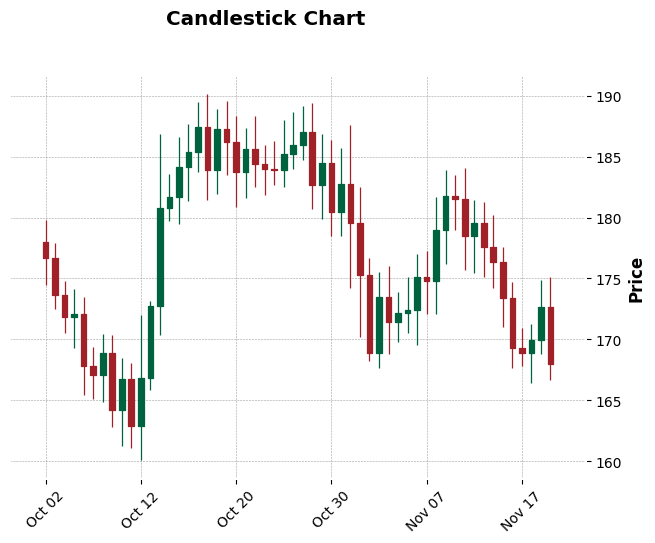

In [93]:
plot_candlestick_from_dict(ohlc_data)

In [94]:
ohlc_data['Date'] = pd.to_datetime(ohlc_data['Date'])
ohlc_data.set_index('Date', inplace=True)

generate_signals(ohlc_data)

,Date,Signal
0,2024-10-02,NEUTRAL
1,2024-10-03,NEUTRAL
2,2024-10-02,NEUTRAL
3,2024-10-03,NEUTRAL
4,2024-10-04,BUY
5,2024-10-05,NEUTRAL
6,2024-10-06,NEUTRAL
7,2024-10-07,NEUTRAL
8,2024-10-08,NEUTRAL
9,2024-10-09,NEUTRAL
